In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 9,5

In [2]:
data = pd.read_csv('/home/mugesh/Projects/telco-churn/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

###  *Checking for the data info and the null values*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *No null values so we are good to go and lets see the insights of the data*

73.46% Not Churn ----- 26.54% Churn


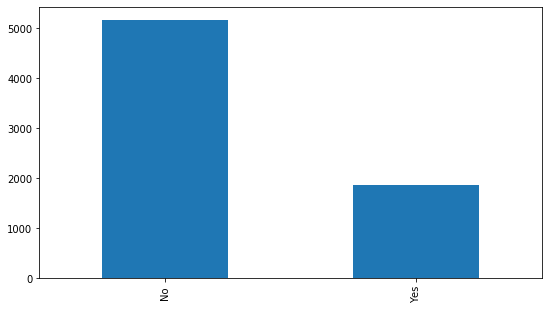

In [7]:
## Checking the balance of data
data['Churn'].value_counts().plot(kind = 'bar')
x = np.round((data['Churn'].value_counts() / 7043 ) *100, 2)
print(f'{x[0]}% Not Churn ----- {x[1]}% Churn')
plt.show()

### *Data is imbalanced* 

### *Analysing the Services*

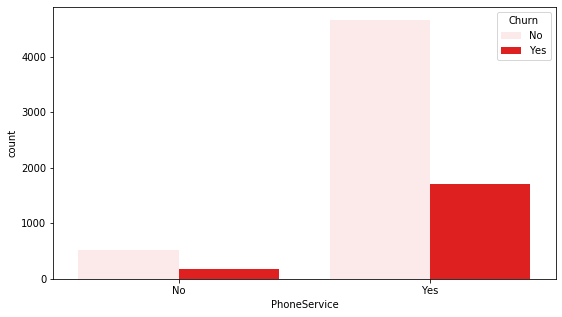

In [8]:
sns.countplot(x= data.PhoneService,hue= data.Churn, hue_order=['No',"Yes"], color='r')
plt.show()

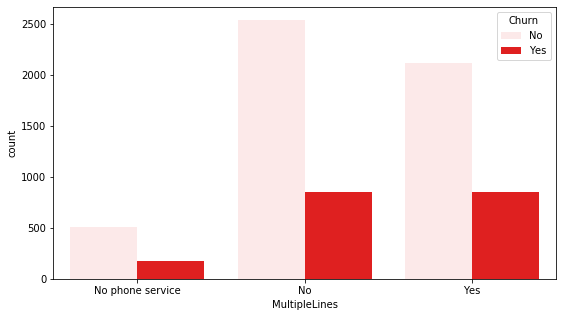

In [9]:
sns.countplot(x= data.MultipleLines,hue= data.Churn, hue_order=['No',"Yes"], color='r')
plt.show()

##### Multiple lines has no effect on churn

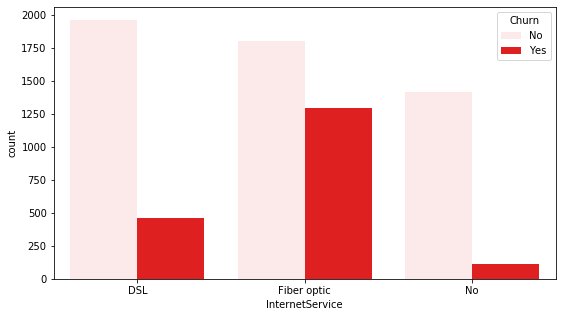

In [10]:
sns.countplot(x= data.InternetService, hue= data.Churn, hue_order=['No',"Yes"], color= 'r')
plt.show()

### *Analysing the Entertainments*

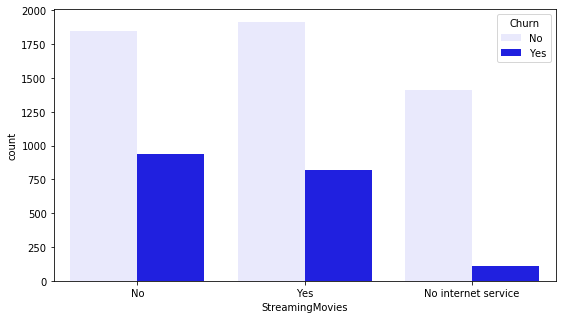

In [11]:
sns.countplot(x= data.StreamingMovies, hue= data.Churn, hue_order=['No',"Yes"], color= 'b')
plt.show()

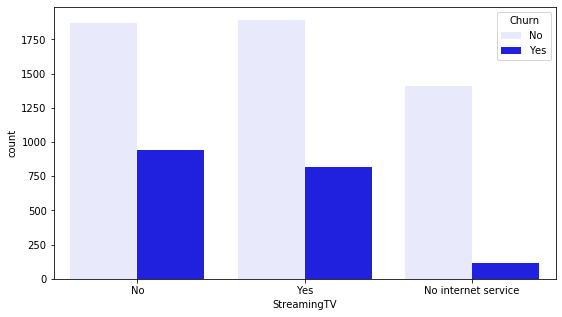

In [12]:
sns.countplot(x= data.StreamingTV, hue= data.Churn, hue_order=['No',"Yes"], color= 'b')
plt.show()

##### Both the Movies and TV features seams to be similar 

### *Analyze the securities and backups*

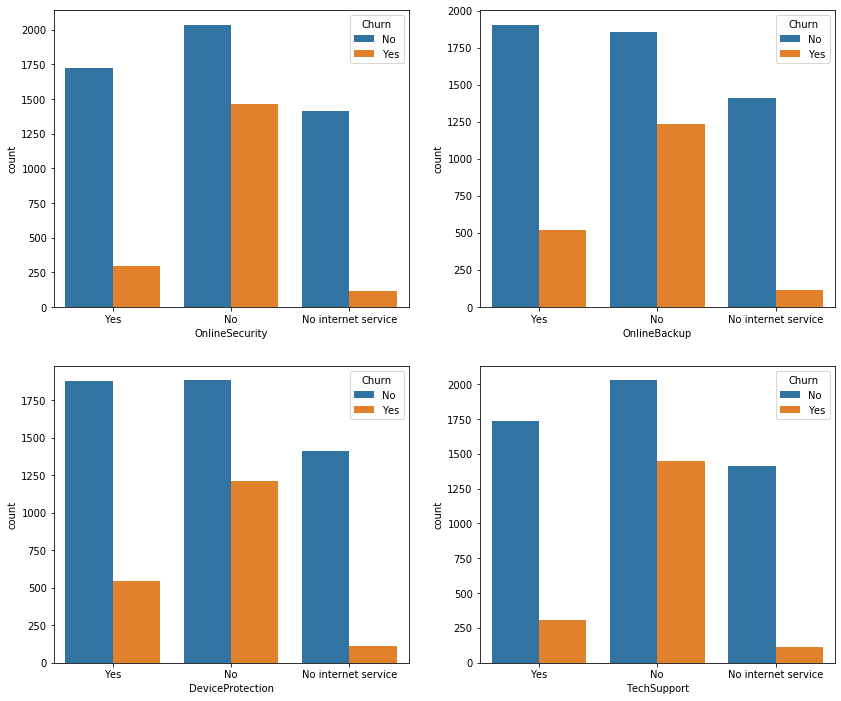

In [13]:
fig,axes = plt.subplots(2,2,figsize=(14,12))
sns.countplot(x='OnlineSecurity',hue='Churn',data=data,order=['Yes','No','No internet service'],ax=axes[0,0])
sns.countplot(x='OnlineBackup',hue='Churn',data=data,order=['Yes','No','No internet service'],ax=axes[0,1])
sns.countplot(x='DeviceProtection',hue='Churn',data=data,order=['Yes','No','No internet service'],ax=axes[1,0])
sns.countplot(x='TechSupport',hue='Churn',data=data,order=['Yes','No','No internet service'],ax=axes[1,1])
plt.show()

#### *Online Security,  Device Protection and Online Backup plays important role in the customers churn*

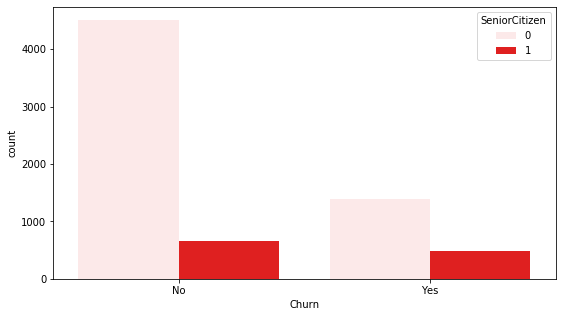

In [14]:
sns.countplot(x=data.Churn,hue=data.SeniorCitizen,  color= 'r')
plt.show()

### *Analyze the User*

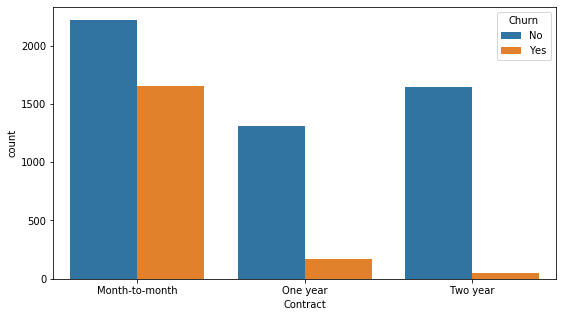

In [15]:
sns.countplot(x='Contract',hue='Churn',data=data,order=['Month-to-month','One year','Two year'])

##### Month to Month contracts has the highest churn

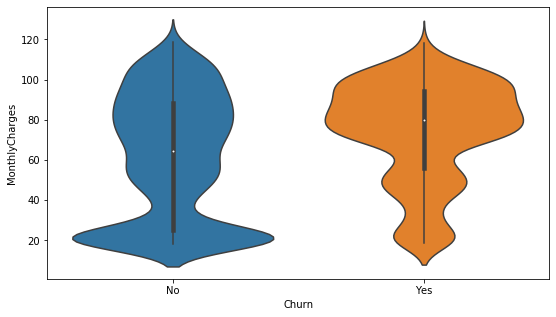

In [16]:
sns.violinplot(x=data.Churn, y=data.MonthlyCharges)
plt.show()

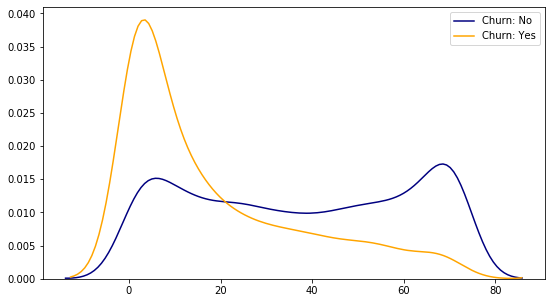

In [17]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['tenure'], color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['tenure'], color= 'orange', label= 'Churn: Yes')
plt.show()

##### Churn based on tenure long the customers they are staying 

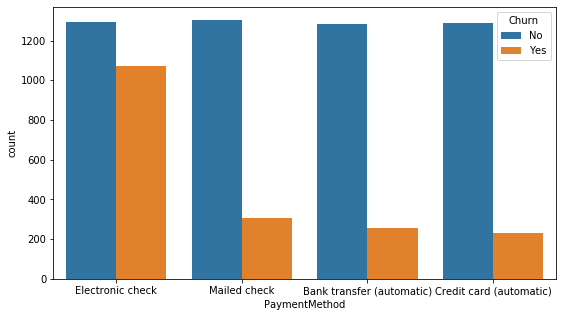

In [18]:
sns.countplot(x='PaymentMethod',hue='Churn',data=data,order=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
plt.show()

###### Electronic Check has the highest churn

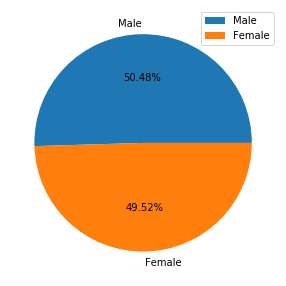

In [19]:
plt.pie(data.gender.value_counts(), labels=['Male', 'Female'],autopct='%1.2f%%')
plt.legend()
plt.show()